In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import os
import csv

In [16]:
#load csv
final = os.path.join("..", "final_df.csv")
salaries_data = os.path.join("..", "Players_Salaries.xlsx")

final_df = pd.read_csv(final)
salaries_stats_df = pd.read_excel(salaries_data)
salary_2015_df = pd.read_excel(salaries_data, sheet_name='2015')
salary_2016_df = pd.read_excel(salaries_data, sheet_name='2016')
salary_2017_df = pd.read_excel(salaries_data, sheet_name='2017')
salary_2018_df = pd.read_excel(salaries_data, sheet_name='2018')
salary_2019_df = pd.read_excel(salaries_data, sheet_name='2019')
final_df.head()

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,PG,Golden State Warriors,11370786,28,79,71,8,34.2,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
1,2015,Shaun Livingston,G,Golden State Warriors,5543725,30,78,69,9,19.5,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
2,2015,Marreese Speights,F,Golden State Warriors,3815000,28,72,64,8,11.6,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
3,2015,Leandro Barbosa,G,Golden State Warriors,2500000,33,68,60,8,15.9,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
4,2015,Klay Thompson,SG,Golden State Warriors,15501000,26,80,71,9,33.3,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31


In [17]:
final_df.columns

Index(['YEAR', 'PLAYER', 'POSITION', 'TEAM', 'SALARY', 'AGE', 'GP', 'W', 'L',
       'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PF', 'FP',
       'DD2', 'TD3', '+/-', 'RK'],
      dtype='object')

In [18]:
salaries_stats_df.columns

Index(['RK', 'NAME', 'TEAM', 'SALARY', 'YEAR'], dtype='object')

In [19]:
#create dataframe for 2015 Clippers salaries
clipper_salary_2015_df = salary_2015_df.loc[salary_2015_df['TEAM'] == "LA Clippers"]
clipper_salary_2015_df.head(5)

,RK,NAME,TEAM,SALARY,YEAR
5,6,"Chris Paul, PG",LA Clippers,21468695,2015
10,11,"DeAndre Jordan, C",LA Clippers,19689000,2015
14,15,"Blake Griffin, PF",LA Clippers,18907726,2015
103,104,"JJ Redick, SG",LA Clippers,7085000,2015
127,128,"Jamal Crawford, G",LA Clippers,5675000,2015


In [20]:
#create dataframe and show 2016 Clippers Salaries
clipper_salary_2016_df = salary_2016_df.loc[salary_2016_df['TEAM'] == "LA Clippers"]
clipper_salary_2016_df.head(5)

,RK,NAME,TEAM,SALARY,YEAR
13,14,"Chris Paul, PG",LA Clippers,22868827,2016
22,23,"DeAndre Jordan, C",LA Clippers,21165675,2016
27,28,"Blake Griffin, PF",LA Clippers,20140839,2016
68,69,"Jamal Crawford, G",LA Clippers,13253012,2016
96,97,"Austin Rivers, PG",LA Clippers,11000000,2016


In [21]:
#create dataframe and show 2017 Clippers Salaries
clipper_salary_2017_df = salary_2017_df.loc[salary_2017_df['TEAM'] == "LA Clippers"]
clipper_salary_2017_df.head(5)

,RK,NAME,TEAM,SALARY,YEAR
1,2,"Blake Griffin, PF",LA Clippers,32088932,2017
29,30,"DeAndre Jordan, C",LA Clippers,22642350,2017
35,36,"Danilo Gallinari, PF",LA Clippers,20559599,2017
64,65,"Tobias Harris, SF",LA Clippers,16000000,2017
90,91,"Austin Rivers, PG",LA Clippers,12650000,2017


In [22]:
#create dataframe and show 2018 Clippers Salaries
clipper_salary_2018_df = salary_2018_df.loc[salary_2018_df['TEAM'] == "LA Clippers"]
clipper_salary_2018_df.head(5)

,RK,NAME,TEAM,SALARY,YEAR
38,39,"Danilo Gallinari, PF",LA Clippers,21587579,2018
82,83,"Marcin Gortat, C",LA Clippers,13565218,2018
146,147,"Lou Williams, SG",LA Clippers,8000000,2018
172,173,"Milos Teodosic, G",LA Clippers,6300000,2018
178,179,"Montrezl Harrell, PF",LA Clippers,6000000,2018


In [23]:
#create dataframe and show 2019 Clippers Salaries
clipper_salary_2019_df = salary_2019_df.loc[salary_2019_df['TEAM'] == "LA Clippers"]
clipper_salary_2019_df.head(5)


,RK,NAME,TEAM,SALARY,YEAR
11,12,"Kawhi Leonard, SF",LA Clippers,32742000,2019
18,19,"Paul George, SF",LA Clippers,30560700,2019
93,94,"Marcin Gortat, C",LA Clippers,13565218,2019
112,113,"Patrick Beverley, PG",LA Clippers,12345680,2019
123,124,"Maurice Harkless, SF",LA Clippers,11011234,2019


In [24]:
#set variables for positions listed on dataset: 
#(G)Guard,(PG)Point Guard,(SG)Shooting Guard,(PF)Power Forward,(SF)Small Forward,(C)Center
point_guard_stats_df = final_df.loc[final_df['POSITION'] == ' PG' ]
guard_stats_df = final_df.loc[final_df['POSITION'] == ' G' ]
shooting_guard_stats_df = final_df.loc[final_df['POSITION'] == ' SG' ]
power_forward_stats_df = final_df.loc[final_df['POSITION'] == ' PF' ]
small_forward_stats_df = final_df.loc[final_df['POSITION'] == ' SF' ]
center_stats_df = final_df.loc[final_df['POSITION'] == ' C' ]

In [25]:
#create dataframe for Point Guard
point_guard_stats_df = final_df.loc[final_df['POSITION'] == ' PG' ]
point_guard_stats_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
0,2015,Stephen Curry,PG,Golden State Warriors,11370786,28,79,71,8,34.2,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
31,2016,Stephen Curry,PG,Golden State Warriors,12112359,29,79,65,14,33.4,...,6.6,3.0,1.8,0.2,2.3,43.6,9,0,12.8,82
34,2017,Stephen Curry,PG,Golden State Warriors,37457154,30,51,41,10,32.0,...,6.1,3.0,1.6,0.2,2.2,43.8,5,0,9.5,1
36,2017,Quinn Cook,PG,Golden State Warriors,1544951,25,33,21,12,22.4,...,2.7,1.0,0.4,0.0,1.8,16.7,0,0,-1.2,332
48,2018,Stephen Curry,PG,Golden State Warriors,37457154,31,69,52,17,33.8,...,5.2,2.8,1.3,0.4,2.4,43.8,3,0,10.0,1
50,2018,Quinn Cook,PG,Golden State Warriors,1544951,26,74,49,25,14.3,...,1.6,0.7,0.3,0.0,1.2,12.0,0,0,-1.8,351
74,2019,Stephen Curry,PG,Golden State Warriors,40231758,31,4,1,3,28.0,...,6.5,3.8,1.3,0.5,2.5,37.5,1,0,-8.0,1
79,2015,Jordan Clarkson,PG,Los Angeles Lakers,845059,24,79,17,62,32.3,...,2.4,1.7,1.1,0.1,2.1,25.8,1,0,-7.9,424
95,2016,Jordan Clarkson,PG,Los Angeles Lakers,12500000,25,82,26,56,29.2,...,2.6,2.0,1.1,0.1,1.8,23.7,0,0,-5.1,76
110,2017,Isaiah Thomas,PG,Los Angeles Lakers,6261395,29,17,8,9,26.8,...,5.0,3.2,0.4,0.1,1.9,23.7,0,0,0.9,173


In [26]:
final_df[["REB","PLAYER"]]

,REB,PLAYER
0,5.4,Stephen Curry
1,2.2,Shaun Livingston
2,3.3,Marreese Speights
3,1.7,Leandro Barbosa
4,3.8,Klay Thompson
...,...,...
321,6.4,Nemanja Bjelica
322,8.5,Richaun Holmes
323,4.7,Trevor Ariza
324,0.9,Wenyen Gabriel


In [27]:
#set PLAYER  index
players_index_df = final_df.set_index("PLAYER")
players_index_df

,YEAR,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
PLAYER,,,,,,,,,,,,,,,,,,,,,
Stephen Curry,2015,PG,Golden State Warriors,11370786,28,79,71,8,34.2,30.1,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
Shaun Livingston,2015,G,Golden State Warriors,5543725,30,78,69,9,19.5,6.3,...,3.0,1.0,0.7,0.3,1.8,15.6,0,0,2.7,132
Marreese Speights,2015,F,Golden State Warriors,3815000,28,72,64,8,11.6,7.1,...,0.8,0.9,0.3,0.5,1.6,13.7,1,0,0.2,183
Leandro Barbosa,2015,G,Golden State Warriors,2500000,33,68,60,8,15.9,6.4,...,1.2,0.8,0.6,0.1,1.6,11.8,0,0,0.6,243
Klay Thompson,2015,SG,Golden State Warriors,15501000,26,80,71,9,33.3,22.1,...,2.1,1.7,0.8,0.6,1.9,32.2,0,0,10.5,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nemanja Bjelica,2019,PF,Sacramento Kings,6825000,31,40,15,25,27.3,12.2,...,2.5,1.6,0.9,0.6,3.0,26.5,5,0,-1.3,184
Richaun Holmes,2019,PF,Sacramento Kings,4767000,26,37,14,23,29.4,13.1,...,1.0,1.2,1.1,1.4,3.9,30.9,13,0,0.2,218
Trevor Ariza,2019,SF,Sacramento Kings,12195122,34,31,12,19,24.9,6.1,...,1.5,0.9,1.1,0.2,2.0,17.1,0,0,-1.5,114


In [28]:
#highest paid 
highest_paid = final_df.loc[final_df["SALARY"] > 30000000, ["PLAYER","YEAR", "TEAM","POSITION", "PTS","GP","SALARY","REB","AST","TOV","STL","BLK","MIN"]]
highest_paid

,PLAYER,YEAR,TEAM,POSITION,PTS,GP,SALARY,REB,AST,TOV,STL,BLK,MIN
34,Stephen Curry,2017,Golden State Warriors,PG,26.4,51,37457154,5.1,6.1,3.0,1.6,0.2,32.0
48,Stephen Curry,2018,Golden State Warriors,PG,27.3,69,37457154,5.3,5.2,2.8,1.3,0.4,33.8
74,Stephen Curry,2019,Golden State Warriors,PG,20.3,4,40231758,5.0,6.5,3.8,1.3,0.5,28.0
127,LeBron James,2018,Los Angeles Lakers,SF,27.4,55,35654150,8.5,8.3,3.6,1.3,0.6,35.2
145,LeBron James,2019,Los Angeles Lakers,SF,25.5,38,37436858,7.8,10.7,3.7,1.3,0.5,34.9
191,Blake Griffin,2017,LA Clippers,PF,22.6,33,32088932,7.9,5.4,3.0,0.9,0.3,34.5
230,Paul George,2019,LA Clippers,SF,23.5,26,30560700,6.0,3.7,3.3,1.5,0.5,30.7
238,Kawhi Leonard,2019,LA Clippers,SF,25.8,30,32742000,7.5,5.1,3.4,1.9,0.5,32.2


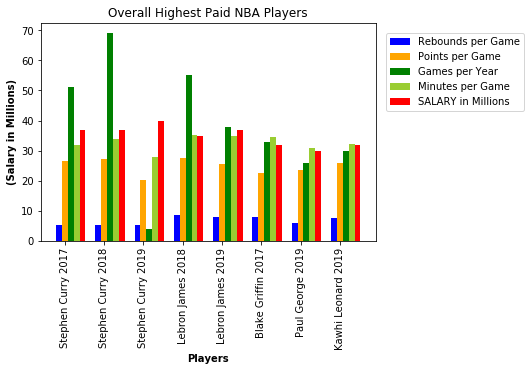

In [29]:
#highest paid overal nba players
#set with of bar
barWidth = 0.15

#set height of bars
PTS_means = [26.4, 27.3, 20.3, 27.4, 25.5, 22.6, 23.5, 25.8]
GP_means = [51, 69, 4, 55, 38, 33, 26, 30]
MIN_means = [32, 33.8, 28, 35.2, 34.9, 34.5, 30.7, 32.2]
REB_means = [5.1, 5.3, 5.1, 8.5, 7.8, 7.9, 6.0, 7.5]
SALARY = [37, 37, 40, 35, 37, 32, 30, 32]


# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
# Add xticks on the middle of the group bars

plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Stephen Curry 2017', 'Stephen Curry 2018', 'Stephen Curry 2019', 'Lebron James 2018', 'Lebron James 2019', 'Blake Griffin 2017', 'Paul George 2019', 'Kawhi Leonard 2019'],rotation=90)
plt.title('Overall Highest Paid NBA Players')

#create group based on highest paid players
plt.xlabel("Players")
plt.ylabel("(Salary in Millions)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()


In [30]:
highest_paid = final_df.loc[final_df["SALARY"] > 20000000, ["PLAYER","YEAR", "TEAM","POSITION", "PTS","GP","SALARY","REB","AST","TOV","STL","BLK","MIN"]]
highest_paid

,PLAYER,YEAR,TEAM,POSITION,PTS,GP,SALARY,REB,AST,TOV,STL,BLK,MIN
25,Kevin Durant,2016,Golden State Warriors,SF,25.1,62,26540100,8.3,4.8,2.2,1.1,1.6,33.4
34,Stephen Curry,2017,Golden State Warriors,PG,26.4,51,37457154,5.1,6.1,3.0,1.6,0.2,32.0
48,Stephen Curry,2018,Golden State Warriors,PG,27.3,69,37457154,5.3,5.2,2.8,1.3,0.4,33.8
53,Kevin Durant,2018,Golden State Warriors,SF,26.0,78,30000000,6.4,5.9,2.9,0.7,1.1,34.6
65,D'Angelo Russell,2019,Golden State Warriors,SG,23.7,23,27285000,3.5,6.0,3.0,0.8,0.3,31.5
74,Stephen Curry,2019,Golden State Warriors,PG,20.3,4,40231758,5.0,6.5,3.8,1.3,0.5,28.0
81,Kobe Bryant,2015,Los Angeles Lakers,SF,17.6,66,25000000,3.7,2.8,2.0,0.9,0.2,28.2
113,Brook Lopez,2017,Los Angeles Lakers,C,13.0,74,22642650,4.0,1.7,1.3,0.4,1.3,23.4
127,LeBron James,2018,Los Angeles Lakers,SF,27.4,55,35654150,8.5,8.3,3.6,1.3,0.6,35.2
144,Anthony Davis,2019,Los Angeles Lakers,PF,27.1,35,27093018,9.4,3.2,2.4,1.5,2.6,35.2


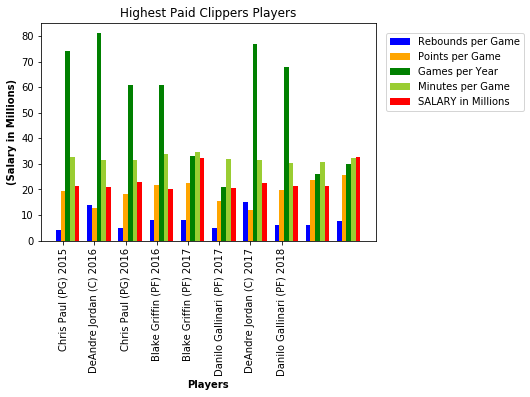

In [31]:
#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Highest Paid Clippers Players')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Chris Paul (PG) 2015', "DeAndre Jordan (C) 2016", "Chris Paul (PG) 2016", 'Blake Griffin (PF) 2016', 'Blake Griffin (PF) 2017', 'Danilo Gallinari (PF) 2017', 'DeAndre Jordan (C) 2017', 'Danilo Gallinari (PF) 2018', 'Paul George (SF) 2019', 'Kawhi Leonard (SF) 2019'],rotation=90)


#set height of bars
REB_means = [4.2, 13.8, 5.0, 8.1, 7.9, 4.8, 15.2, 6.1, 6.0, 7.5]
PTS_means = [19.5, 12.7, 18.1, 21.6, 22.6, 15.3, 12.0, 19.8, 23.5, 25.8]
GP_means = [74, 81, 61, 61, 33, 21, 77, 68, 26, 30]
MIN_means = [32.7, 31.7, 31.5, 34.0, 34.5, 32.0, 31.5, 30.3, 30.7, 32.2]
SALARY = [21.4, 21.1, 22.8, 20.1, 32.1, 20.5, 22.6, 21.5, 21.5, 32.7]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#create group based on highest paid players
plt.xlabel("Players")
plt.ylabel("(Salary in Millions)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()

In [32]:
curry_pts = players_index_df.loc[["Stephen Curry","YEAR"]]
print(curry_pts)

                 YEAR POSITION                   TEAM      SALARY   AGE    GP  \
PLAYER                                                                          
Stephen Curry  2015.0       PG  Golden State Warriors  11370786.0  28.0  79.0   
Stephen Curry  2016.0       PG  Golden State Warriors  12112359.0  29.0  79.0   
Stephen Curry  2017.0       PG  Golden State Warriors  37457154.0  30.0  51.0   
Stephen Curry  2018.0       PG  Golden State Warriors  37457154.0  31.0  69.0   
Stephen Curry  2019.0       PG  Golden State Warriors  40231758.0  31.0   4.0   
YEAR              NaN      NaN                    NaN         NaN   NaN   NaN   

                  W     L   MIN   PTS  ...  AST  TOV  STL  BLK   PF    FP  \
PLAYER                                 ...                                  
Stephen Curry  71.0   8.0  34.2  30.1  ...  6.7  3.3  2.1  0.2  2.0  50.3   
Stephen Curry  65.0  14.0  33.4  25.3  ...  6.6  3.0  1.8  0.2  2.3  43.6   
Stephen Curry  41.0  10.0  32.0  26.4  ... 

/Users/helenau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [33]:
#get avg of Stephen Curry points
curry_pts.mean()

YEAR          2017.00
SALARY    27725842.20
AGE             29.80
GP              56.40
W               46.00
L               10.40
MIN             32.28
PTS             25.88
FGM              8.62
FGA             18.26
FG%             46.96
3PM              4.16
3PA             10.40
3P%             39.36
FTM              4.50
FTA              4.86
FT%             92.86
OREB             0.82
DREB             4.28
REB              5.06
AST              6.22
TOV              3.18
STL              1.62
BLK              0.30
PF               2.28
FP              43.80
DD2              6.60
TD3              0.40
+/-              7.44
RK              29.20
dtype: float64

In [34]:
curry_salary = players_index_df.loc["Stephen Curry","SALARY"]
print(curry_salary)

PLAYER
Stephen Curry    11370786
Stephen Curry    12112359
Stephen Curry    37457154
Stephen Curry    37457154
Stephen Curry    40231758
Name: SALARY, dtype: int64


In [35]:
#avg of salary s.curry
curry_salary.mean()

27725842.2

In [36]:
lowest_paid = final_df.loc[final_df["SALARY"] < 600000, ["PLAYER","TEAM","POSITION", "PTS","SALARY","REB","MIN", "GP"]]
lowest_paid

,PLAYER,TEAM,POSITION,PTS,SALARY,REB,MIN,GP
6,Jason Thompson,Toronto Raptors,PF,2.1,245177,1.9,6.4,28
15,Anderson Varejao,Golden State Warriors,C,2.6,289755,2.3,8.4,22
18,Briante Weber,Charlotte Hornets,G,1.7,128623,0.6,6.6,7
28,Matt Barnes,Sacramento Kings,SF,5.7,242224,4.6,20.5,20
29,Patrick McCaw,Golden State Warriors,SG,4.0,543471,1.4,15.1,71
60,Andrew Bogut,Golden State Warriors,C,3.5,307648,5.0,12.2,11
93,David Nwaba,Los Angeles Lakers,G,6.0,73528,3.2,19.9,20
96,Jose Calderon,Los Angeles Lakers,G,3.3,247991,1.8,12.2,24
114,Andre Ingram,Los Angeles Lakers,G,12.0,13824,3.0,32.1,2
119,Travis Wear,Los Angeles Lakers,F,4.4,148318,2.2,13.4,17


In [37]:
blake_pts = players_index_df.loc[["Blake Griffin","REB"]]
print(blake_pts)

                 YEAR POSITION         TEAM      SALARY   AGE    GP     W  \
PLAYER                                                                      
Blake Griffin  2015.0       PF  LA Clippers  18907726.0  27.0  35.0  22.0   
Blake Griffin  2016.0       PF  LA Clippers  20140839.0  28.0  61.0  40.0   
Blake Griffin  2017.0       PF  LA Clippers  32088932.0  29.0  33.0  17.0   
REB               NaN      NaN          NaN         NaN   NaN   NaN   NaN   

                  L   MIN   PTS  ...  AST  TOV  STL  BLK   PF    FP   DD2  \
PLAYER                           ...                                        
Blake Griffin  13.0  33.4  21.4  ...  4.9  2.4  0.8  0.5  2.7  40.3  13.0   
Blake Griffin  21.0  34.0  21.6  ...  4.9  2.3  0.9  0.4  2.6  40.3  19.0   
Blake Griffin  16.0  34.5  22.6  ...  5.4  3.0  0.9  0.3  2.4  40.7  11.0   
REB             NaN   NaN   NaN  ...  NaN  NaN  NaN  NaN  NaN   NaN   NaN   

               TD3  +/-    RK  
PLAYER                         
Blake Grif

/Users/helenau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


In [38]:
#set index to 'Team'
team_df = point_guard_stats_df.set_index("TEAM")
team_df

,YEAR,PLAYER,POSITION,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
TEAM,,,,,,,,,,,,,,,,,,,,,
Golden State Warriors,2015,Stephen Curry,PG,11370786,28,79,71,8,34.2,30.1,...,6.7,3.3,2.1,0.2,2.0,50.3,15,2,12.9,61
Golden State Warriors,2016,Stephen Curry,PG,12112359,29,79,65,14,33.4,25.3,...,6.6,3.0,1.8,0.2,2.3,43.6,9,0,12.8,82
Golden State Warriors,2017,Stephen Curry,PG,37457154,30,51,41,10,32.0,26.4,...,6.1,3.0,1.6,0.2,2.2,43.8,5,0,9.5,1
Golden State Warriors,2017,Quinn Cook,PG,1544951,25,33,21,12,22.4,9.5,...,2.7,1.0,0.4,0.0,1.8,16.7,0,0,-1.2,332
Golden State Warriors,2018,Stephen Curry,PG,37457154,31,69,52,17,33.8,27.3,...,5.2,2.8,1.3,0.4,2.4,43.8,3,0,10.0,1
Golden State Warriors,2018,Quinn Cook,PG,1544951,26,74,49,25,14.3,6.9,...,1.6,0.7,0.3,0.0,1.2,12.0,0,0,-1.8,351
Golden State Warriors,2019,Stephen Curry,PG,40231758,31,4,1,3,28.0,20.3,...,6.5,3.8,1.3,0.5,2.5,37.5,1,0,-8.0,1
Los Angeles Lakers,2015,Jordan Clarkson,PG,845059,24,79,17,62,32.3,15.5,...,2.4,1.7,1.1,0.1,2.1,25.8,1,0,-7.9,424
Los Angeles Lakers,2016,Jordan Clarkson,PG,12500000,25,82,26,56,29.2,14.7,...,2.6,2.0,1.1,0.1,1.8,23.7,0,0,-5.1,76


In [39]:
#grab only LA Clippers data with .loc
clippers_df = final_df.loc[final_df["TEAM"] == "LA Clippers"]
clippers_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
158,2015,Wesley Johnson,F,LA Clippers,1100602,28,80,51,29,20.8,...,0.6,0.7,1.1,0.7,2.2,16.3,0,0,1.5,346
159,2015,Paul Pierce,SF,LA Clippers,3376000,38,68,44,24,18.1,...,1.0,0.9,0.5,0.3,1.9,12.3,0,0,0.8,199
160,2015,Pablo Prigioni,PG,LA Clippers,947726,39,59,37,22,13.9,...,2.2,0.8,0.9,0.0,1.4,10.0,0,0,-1.1,374
161,2015,Luc Mbah a Moute,F,LA Clippers,947276,29,75,49,26,17.0,...,0.4,0.5,0.6,0.3,1.3,8.5,0,0,2.1,395
163,2015,Josh Smith,PF,LA Clippers,947276,30,32,19,13,14.3,...,1.3,1.3,0.6,1.1,1.9,15.9,0,0,-2.9,415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,2019,Kawhi Leonard,SF,LA Clippers,32742000,28,30,22,8,32.2,...,5.1,3.4,1.9,0.5,2.0,46.3,8,0,7.7,12
239,2019,Jerome Robinson,SG,LA Clippers,3567720,22,32,21,11,11.3,...,0.9,0.7,0.3,0.2,1.4,7.0,0,0,2.1,255
240,2019,JaMychal Green,PF,LA Clippers,4767000,29,31,21,10,21.2,...,0.7,0.9,0.5,0.4,2.6,17.2,4,0,3.5,224
241,2019,Ivica Zubac,C,LA Clippers,6481482,22,40,27,13,17.3,...,0.9,0.9,0.2,0.9,2.4,20.1,5,0,1.5,187


In [40]:
#grab only LA Clippers data with .loc
clippers_df = final_df.loc[final_df["PLAYER"] == 'Blake Griffin']
clippers_df

,YEAR,PLAYER,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
172,2015,Blake Griffin,PF,LA Clippers,18907726,27,35,22,13,33.4,...,4.9,2.4,0.8,0.5,2.7,40.3,13,0,5.1,15
186,2016,Blake Griffin,PF,LA Clippers,20140839,28,61,40,21,34.0,...,4.9,2.3,0.9,0.4,2.6,40.3,19,1,7.2,28
191,2017,Blake Griffin,PF,LA Clippers,32088932,29,33,17,16,34.5,...,5.4,3.0,0.9,0.3,2.4,40.7,11,2,0.7,2


In [41]:
#stats for Guard position Clippers
# guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' G']
# guard_stats_df


In [42]:
guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' G', ["TEAM","POSITION", "PTS","SALARY","REB","MIN", "GP"]]
guard_stats_df.head(10)

,TEAM,POSITION,PTS,SALARY,REB,MIN,GP
PLAYER,,,,,,,
Shaun Livingston,Golden State Warriors,G,6.3,5543725,2.2,19.5,78
Leandro Barbosa,Golden State Warriors,G,6.4,2500000,1.7,15.9,68
Ian Clark,Golden State Warriors,G,3.6,947276,1.0,8.8,66
Briante Weber,Charlotte Hornets,G,1.7,128623,0.6,6.6,7
Ian Clark,Golden State Warriors,G,6.8,980431,1.6,14.8,77
Shaun Livingston,Golden State Warriors,G,5.1,5782450,2.0,17.7,76
Shaun Livingston,Golden State Warriors,G,5.5,7692308,1.8,15.9,71
Nick Young,Golden State Warriors,G,7.3,5192000,1.6,17.4,80
Shaun Livingston,Golden State Warriors,G,4.0,8307692,1.8,15.1,64


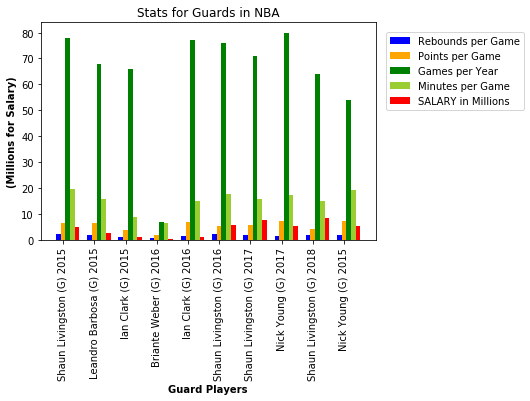

In [43]:
#plot graph for salary correlation to position 'Guard' non clippers
#guard_stats_df


#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Stats for Guards in NBA')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Shaun Livingston (G) 2015', "Leandro Barbosa (G) 2015", "Ian Clark (G) 2015", 'Briante Weber (G) 2016', 'Ian Clark (G) 2016', 'Shaun Livingston (G) 2016', 'Shaun Livingston (G) 2017', 'Nick Young (G) 2017', 'Shaun Livingston (G) 2018', 'Nick Young (G) 2015'],rotation=90)

#set height of bars
REB_means = [2.2, 1.7, 1.0, 0.6, 1.6, 2.0, 1.8, 1.6, 1.8, 1.8]
PTS_means = [6.3, 6.4, 3.6, 1.7, 6.8, 5.1, 5.5, 7.3, 4.0, 7.3]
GP_means = [78, 68, 66, 7, 77, 76, 71, 80, 64, 54]
MIN_means = [19.5, 15.9, 8.8, 6.6, 14.8, 17.7, 15.9, 17.4, 15.1, 19.1]
SALARY = [5.0, 2.5, 0.9, 0.1, 0.9, 5.7, 7.6, 5.1, 8.3, 5.2]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#create group based on highest paid players
plt.xlabel("Guard Players")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()

In [44]:
guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' G',["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
guard_stats_df

,YEAR,TEAM,POSITION,PTS,SALARY,REB,MIN,GP
PLAYER,,,,,,,,
Shaun Livingston,2015,Golden State Warriors,G,6.3,5543725,2.2,19.5,78
Leandro Barbosa,2015,Golden State Warriors,G,6.4,2500000,1.7,15.9,68
Ian Clark,2015,Golden State Warriors,G,3.6,947276,1.0,8.8,66
Briante Weber,2016,Charlotte Hornets,G,1.7,128623,0.6,6.6,7
Ian Clark,2016,Golden State Warriors,G,6.8,980431,1.6,14.8,77
Shaun Livingston,2016,Golden State Warriors,G,5.1,5782450,2.0,17.7,76
Shaun Livingston,2017,Golden State Warriors,G,5.5,7692308,1.8,15.9,71
Nick Young,2017,Golden State Warriors,G,7.3,5192000,1.6,17.4,80
Shaun Livingston,2018,Golden State Warriors,G,4.0,8307692,1.8,15.1,64


In [45]:
clippers_guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' G', ["TEAM", "YEAR", "POSITION", "PTS","SALARY","REB","MIN", "GP"]]
clippers_guard_stats_df


,TEAM,YEAR,POSITION,PTS,SALARY,REB,MIN,GP
PLAYER,,,,,,,,
Shaun Livingston,Golden State Warriors,2015,G,6.3,5543725,2.2,19.5,78
Leandro Barbosa,Golden State Warriors,2015,G,6.4,2500000,1.7,15.9,68
Ian Clark,Golden State Warriors,2015,G,3.6,947276,1.0,8.8,66
Briante Weber,Charlotte Hornets,2016,G,1.7,128623,0.6,6.6,7
Ian Clark,Golden State Warriors,2016,G,6.8,980431,1.6,14.8,77
Shaun Livingston,Golden State Warriors,2016,G,5.1,5782450,2.0,17.7,76
Shaun Livingston,Golden State Warriors,2017,G,5.5,7692308,1.8,15.9,71
Nick Young,Golden State Warriors,2017,G,7.3,5192000,1.6,17.4,80
Shaun Livingston,Golden State Warriors,2018,G,4.0,8307692,1.8,15.1,64


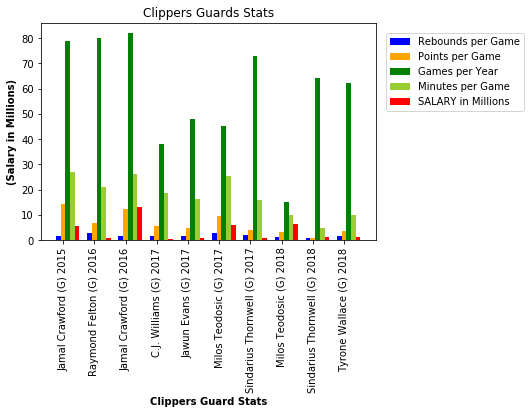

In [46]:
#plot graph for salary correlation to position 'Guards' CLIPPERS
#clippers Guards


#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Clippers Guards Stats')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Jamal Crawford (G) 2015', 'Raymond Felton (G) 2016', 'Jamal Crawford (G) 2016', 'C.J. Williams (G) 2017', 'Jawun Evans (G) 2017', 'Milos Teodosic (G) 2017', 'Sindarius Thornwell (G) 2017', 'Milos Teodosic (G) 2018', 'Sindarius Thornwell (G) 2018', 'Tyrone Wallace (G) 2018'],rotation=90)
#set height of bars
REB_means = [1.8, 2.7, 1.6, 1.5, 1.8, 2.8, 1.9, 1.1, 0.7, 1.6]
PTS_means = [14.2, 6.7, 12.3, 5.5, 4.8, 9.5, 3.9, 3.2, 1.0, 3.5]
GP_means = [79, 80, 82, 38, 48, 45, 73, 15, 64, 62]
MIN_means = [26.9, 21.2, 26.3, 18.6, 16.2, 25.2, 15.8, 10, 4.9, 10.1]
SALARY = [5.6, 0.9, 13.2, 0.3, 0.8, 6, 0.8, 6.3, 1.37, 1.34]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#create group based on highest paid players
plt.xlabel("Clippers Guard Stats")
plt.ylabel("(Salary in Millions)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()

In [47]:
shooting_guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' SG' ,["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
shooting_guard_stats_df.tail(40)

,YEAR,TEAM,POSITION,PTS,SALARY,REB,MIN,GP
PLAYER,,,,,,,,
Josh Hart,2018,Los Angeles Lakers,SG,7.8,1655160,3.7,25.6,67
Isaac Bonga,2018,Los Angeles Lakers,SG,0.9,1000000,1.1,5.5,22
Kentavious Caldwell-Pope,2019,Los Angeles Lakers,SG,9.3,8089282,2.1,25.3,40
Danny Green,2019,Los Angeles Lakers,SG,8.7,14634146,3.7,25.3,39
Alex Caruso,2019,Los Angeles Lakers,SG,5.9,2750000,2.0,19.6,37
Troy Daniels,2019,Los Angeles Lakers,SG,4.3,1620564,1.2,11.7,30
Talen Horton-Tucker,2019,Los Angeles Lakers,SG,0.0,898310,0.0,2.7,2
JJ Redick,2015,LA Clippers,SG,16.3,7085000,1.9,28.0,75
JJ Redick,2016,LA Clippers,SG,15.0,7377500,2.2,28.2,78


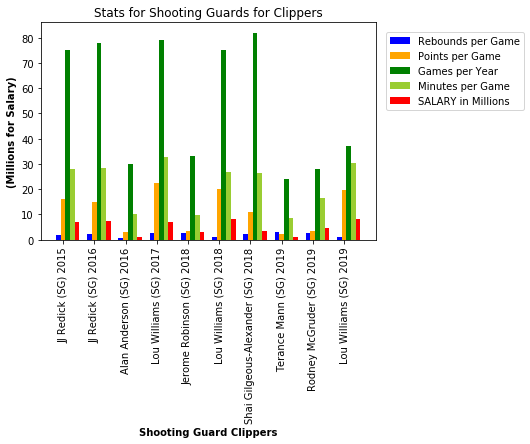

In [48]:
#plot graph for salary correlation to position 'SG' for clippers
# Shooting Guard positions get paid less 

#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Stats for Shooting Guards for Clippers')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['JJ Redick (SG) 2015', 'JJ Redick (SG) 2016', 'Alan Anderson (SG) 2016', 'Lou Williams (SG) 2017', 'Jerome Robinson (SG) 2018', 'Lou Williams (SG) 2018', 'Shai Gilgeous-Alexander (SG) 2018', 'Terance Mann (SG) 2019', 'Rodney McGruder (SG) 2019', 'Lou Williams (SG) 2019'],rotation=90)

#set height of bars
REB_means = [1.9, 2.2, 0.8, 2.5, 2.5, 1.2, 2.2, 3.0, 2.8, 1.0]
PTS_means = [16.3, 15.0, 2.9, 22.6, 3.4, 20, 10.8, 2.2, 3.6, 19.8]
GP_means = [75, 78, 30, 79, 33, 75, 82, 24, 28, 37]
MIN_means = [28, 28.2, 10.3, 32.8, 9.7, 26.6, 26.5, 8.5, 16.6, 30.4]
SALARY = [7.08, 7.37, 0.98, 7, 3.04, 8.0, 3.37, 1, 4.8, 8]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#create group based on highest paid players
plt.xlabel("Shooting Guard Clippers")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()


In [49]:
power_forward_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' PF' ,["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
power_forward_stats_df


,YEAR,TEAM,POSITION,PTS,SALARY,REB,MIN,GP
PLAYER,,,,,,,,
Kevon Looney,2015,Golden State Warriors,PF,1.8,1131960,2.0,4.1,5
Jason Thompson,2015,Toronto Raptors,PF,2.1,245177,1.9,6.4,28
Draymond Green,2015,Golden State Warriors,PF,14.0,14260870,9.5,34.7,81
Draymond Green,2016,Golden State Warriors,PF,10.2,15330435,7.9,32.5,76
Kevon Looney,2016,Golden State Warriors,PF,2.5,1182840,2.3,8.4,53
Kevon Looney,2017,Golden State Warriors,PF,4.0,1471382,3.3,13.8,66
Jordan Bell,2017,Golden State Warriors,PF,4.6,1378242,3.6,14.2,57
Draymond Green,2017,Golden State Warriors,PF,11.0,17469565,7.6,32.7,70
Kevon Looney,2018,Golden State Warriors,PF,6.3,1512601,5.2,18.5,80


In [59]:
power_forward_stats_df = players_index_df.loc[players_index_df['POSITION']=="PF"]
power_forward_stats_df.head(40)

,YEAR,POSITION,TEAM,SALARY,AGE,GP,W,L,MIN,PTS,...,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-,RK
PLAYER,,,,,,,,,,,,,,,,,,,,,


ValueError: shape mismatch: objects cannot be broadcast to a single shape

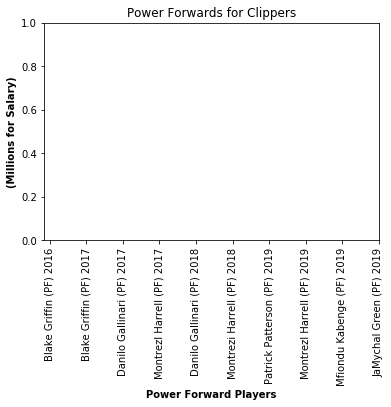

In [55]:
#plot graph for salary correlation to position 'PF' for clippers
# power forward positions inconsistent pay ratio to points scored; some get paid less than others even though they score points

#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Power Forwards for Clippers')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Blake Griffin (PF) 2016', 'Blake Griffin (PF) 2017', 'Danilo Gallinari (PF) 2017', 'Montrezl Harrell (PF) 2017', 'Danilo Gallinari (PF) 2018', 'Montrezi Harrell (PF) 2018', 'Patrick Patterson (PF) 2019', 'Montrezl Harrell (PF) 2019', 'Mfiondu Kabenge (PF) 2019', 'JaMychal Green (PF) 2019'],rotation=90)

#set height of bars
REB_means = []
PTS_means = [21.6, 22.6, 15.3, 11, 19.8, 16.6, 5.1, 19.3, 2.9, 6.9]
GP_means = [61, 33, 21, 76, 68, 82, 35, 39, 10, 31]
MIN_means = [34, 34.5, 32, 17, 30.3, 26.3, 14.1, 29.2, 4.4, 21.2]
SALARY = [20.1, 32.08, 20.55, 1.4, 21.5, 6, 1.6, 6, 1.97, 4.76]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


#create group based on highest paid players
plt.xlabel("Power Forward Players")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()

In [ ]:
small_forward_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' SF' ,["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
small_forward_stats_df

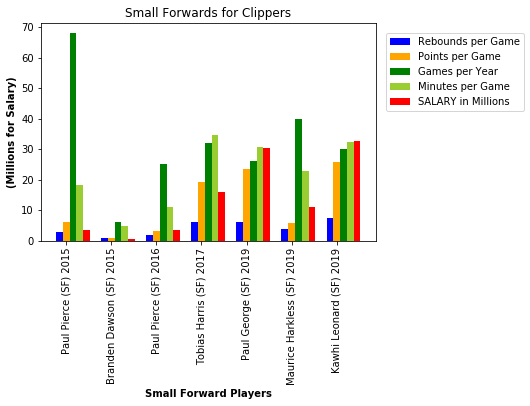

In [53]:
#plot graph for salary correlation to position 'SF' for clippers
# small forward positions; Kawhi Leonard 2019 highest paid; high points 25pts avg per game; low games played; but others low pay

#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Small Forwards for Clippers')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Paul Pierce (SF) 2015', 'Branden Dawson (SF) 2015', 'Paul Pierce (SF) 2016', 'Tobias Harris (SF) 2017', 'Paul George (SF) 2019', 'Maurice Harkless (SF) 2019', 'Kawhi Leonard (SF) 2019'],rotation=90)

#set height of bars
REB_means = [2.7, 0.7, 1.9, 6.0, 6.1, 3.8, 7.5]
PTS_means = [6.1, 0.8, 3.2, 19.3, 23.5, 5.7, 25.8]
GP_means = [68, 6, 25, 32, 26, 40, 30]
MIN_means = [18.1, 4.8, 11.1, 34.5, 30.7, 22.9, 32.2]
SALARY = [3.37, 0.5, 3.5, 16, 30.5, 11, 32.7]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#create group based on highest paid players
plt.xlabel("Small Forward Players")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()

In [ ]:
center_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' C' ,["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
center_stats_df

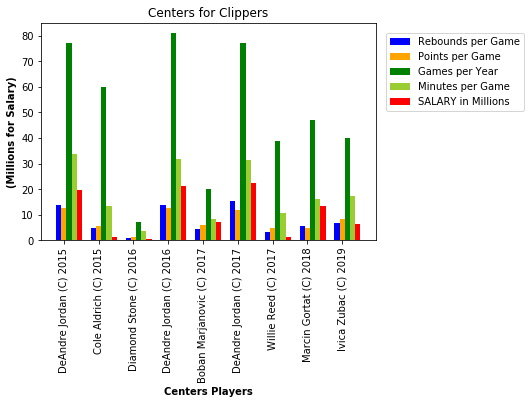

In [52]:
#plot graph for salary correlation to position 'C' for clippers
# Center positions 

#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Centers for Clippers')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['DeAndre Jordan (C) 2015', 'Cole Aldrich (C) 2015', 'Diamond Stone (C) 2016', 'DeAndre Jordan (C) 2016', 'Boban Marjanovic (C) 2017', 'DeAndre Jordan (C) 2017', 'Willie Reed (C) 2017', 'Marcin Gortat (C) 2018', 'Ivica Zubac (C) 2019'],rotation=90)

#set height of bars
REB_means = [13.8, 4.8, 0.9, 13.8, 4.4, 15.2, 3.1, 5.6, 6.8]
PTS_means = [12.7, 5.5, 1.4, 12.7, 5.9, 12, 4.9, 5, 8.2]
GP_means = [77, 60, 7, 81, 20, 77, 39, 47, 40]
MIN_means = [33.7, 13.3, 3.5, 31.7, 8.3, 31.5, 10.7, 16, 17.3]
SALARY = [19.6, 1.1, 0.54, 21.1, 7, 22.6, 1.47, 13.5, 6.4]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


#create group based on highest paid players
plt.xlabel("Centers Players")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()


In [ ]:
point_guard_stats_df = players_index_df.loc[players_index_df['POSITION'] == ' PG' ,["YEAR","TEAM","POSITION","PTS","SALARY","REB","MIN", "GP"]]
point_guard_stats_df

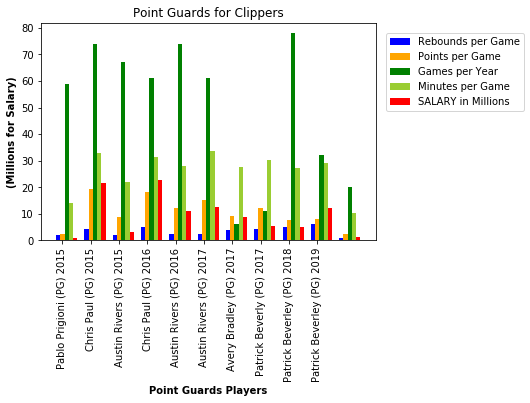

In [51]:
#plot graph for salary correlation to position 'PG' for clippers
# Point Guards positions 

#set with of bar
barWidth = 0.15
# Add xticks on the middle of the group bars
plt.title('Point Guards for Clippers')
plt.xlabel('group', fontweight='bold')
plt.ylabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(PTS_means))], ['Pablo Prigioni (PG) 2015', 'Chris Paul (PG) 2015', 'Austin Rivers (PG) 2015', 'Chris Paul (PG) 2016', 'Austin Rivers (PG) 2016', 'Austin Rivers (PG) 2017', 'Avery Bradley (PG) 2017', 'Patrick Beverly (PG) 2017', 'Patrick Beverley (PG) 2018', 'Patrick Beverley (PG) 2019', 'Derrick Walton, Jr. (PG) 2019'],rotation=90)

#set height of bars
REB_means = [1.9, 4.2, 1.9, 5.0, 2.2, 2.4, 3.7, 4.1, 5.0, 6.2, 0.7 ]
PTS_means = [2.5, 19.5, 8.9, 18.1, 12, 15.1, 9.2, 12.2, 7.6, 8.1, 2.5]
GP_means = [59, 74, 67, 61, 74, 61, 6, 11, 78, 32, 20]
MIN_means = [13.9, 32.7, 21.8, 31.5, 27.8, 33.7, 27.5, 30.3, 27.4, 29.1, 10.3]
SALARY = [0.9, 21.4, 3.1, 22.8, 11, 12.6, 8.8, 5.5, 5, 12.3, 1.4]

# the label locations
r1 = np.arange(len(PTS_means))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


#create group based on highest paid players
plt.xlabel("Point Guards Players")
plt.ylabel("(Millions for Salary)")
 
#make plot
#highest_paid.plot(r1,highest_paid["SALARY"],kind="bar",figsize=(20,3))

#Plot bar and colors and labels
plt.bar(r1, REB_means, color='blue', width=barWidth, label='Rebounds per Game')
plt.bar(r2, PTS_means, color='orange', width=barWidth, label='Points per Game')
plt.bar(r3, GP_means, color='green', width=barWidth, label='Games per Year')
plt.bar(r4, MIN_means, color='yellowgreen', width=barWidth, label='Minutes per Game')
plt.bar(r5, SALARY, color='red', width=barWidth, label='SALARY in Millions')

plt.legend(bbox_to_anchor=(1, 1, 0.6, 0), loc=2, ncol=1, mode="normal", borderaxespad=1)
plt.show()


In [ ]:
#compare top 1,2,3  paid basketball players in all 4 teams

In [ ]:
#scatter plot and regression for clippers lakers
#what are factors that affect salary